In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
'''for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))'''

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
#from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
 

In [3]:
i = plt.imread('/kaggle/input/landscape-image-colorization/landscape Images/color/1010.jpg')
i.shape

(150, 150, 3)

In [4]:
from PIL import Image
def load_color_imgs(impath):
    imgs=[]
    c=0
    for i in os.listdir(impath):
        c=c+1
        img=Image.open(impath+i)
        img=img.resize(size=(128,128))
        imgs.append(np.array(img))
        del img
        if c>=200:
            break  
    return np.array(imgs)

In [5]:
def load_gray_imgs(impath):
    imgs=[]
    c=0
    for i in os.listdir(impath):
        c=c+1
        img=Image.open(impath+i)
        img=img.resize(size=(128,128))
        
        imgs.append(np.array(img).reshape(128,128,1))
        del img
        if c>=200:
            break
    return np.array(imgs)

In [6]:
x=load_gray_imgs('/kaggle/input/landscape-image-colorization/landscape Images/gray/')

In [7]:
y=load_color_imgs('/kaggle/input/landscape-image-colorization/landscape Images/color/')

In [8]:
x.shape,y.shape

((200, 128, 128, 1), (200, 128, 128, 3))

In [9]:
class color_gray(Model):
  def __init__(self):
    super(color_gray, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(128,128, 1)),
      layers.Conv2D(128, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(64, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(32, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
     # layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)
    ])
    
    self.decoder = tf.keras.Sequential([
      #layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(128, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(3, kernel_size=(3,3), activation='relu', padding='same')])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = color_gray()

2022-12-24 06:04:34.706780: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [11]:
autoencoder

In [12]:
autoencoder.encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 128)       1280      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        73792     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          4624      
Total params: 98,160
Trainable params: 98,160
Non-trainable params: 0
_________________________________________________________________


In [13]:
autoencoder.fit(x, y, epochs=100,)

Epoch 1/100


2022-12-24 06:04:35.016505: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


7/7 [==============================] - 14s 2s/step - loss: 16413.9609
Epoch 2/100
7/7 [==============================] - 12s 2s/step - loss: 5028.6045
Epoch 3/100
7/7 [==============================] - 12s 2s/step - loss: 3621.1609
Epoch 4/100
7/7 [==============================] - 12s 2s/step - loss: 2620.2368
Epoch 5/100
7/7 [==============================] - 12s 2s/step - loss: 2332.2302
Epoch 6/100
7/7 [==============================] - 11s 2s/step - loss: 2058.9780
Epoch 7/100
7/7 [==============================] - 12s 2s/step - loss: 1924.0858
Epoch 8/100
7/7 [==============================] - 12s 2s/step - loss: 1813.7098
Epoch 9/100
7/7 [==============================] - 12s 2s/step - loss: 1755.2035
Epoch 10/100
7/7 [==============================] - 12s 2s/step - loss: 1694.7131
Epoch 11/100
7/7 [==============================] - 12s 2s/step - loss: 1661.2170
Epoch 12/100
7/7 [==============================] - 12s 2s/step - loss: 1632.8328
Epoch 13/100
7/7 [==================

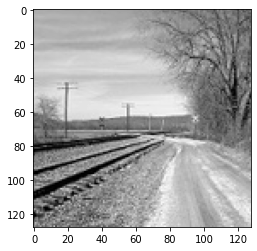

In [14]:
from matplotlib import pyplot as plt
plt.imshow(x[0],cmap='gray')

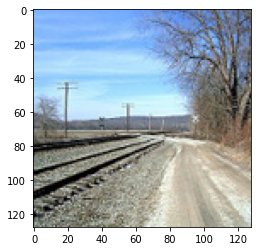

In [15]:
plt.imshow(y[0],cmap='gray')

In [16]:
img = x[0]
img = img.reshape(1,128,128,1)
y_pred = autoencoder.predict(img)
y_pred.shape

(1, 128, 128, 3)

In [17]:
y_pred = np.clip(y_pred,0,255)

In [18]:
y_pred = y_pred.astype(np.uint8)
y_pred.shape

(1, 128, 128, 3)

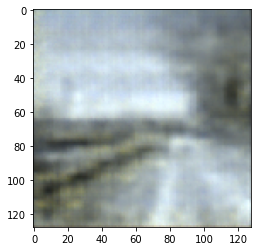

In [19]:
plt.imshow(y_pred[0])